# Inroduction to neural network classification with tensorFlow
a classification  is where you try  to classify something as one thing  or another
A fev classfication problem:
* Binary classification 
* Multiclass classification 
* MultiLabel classification 

In [18]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles
# make 1000 examples
n_samples = 1000
# Create circles
X ,y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [3]:
# checkout the features 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# change he labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


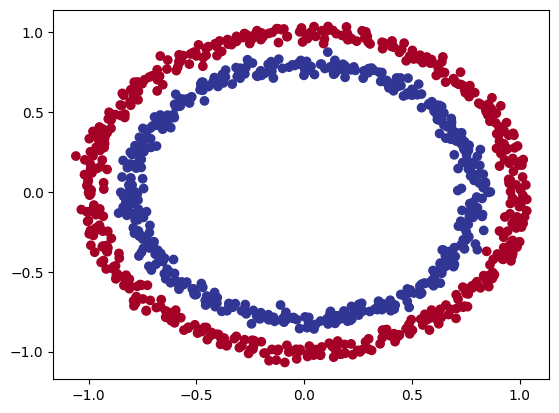

In [6]:
# visualize wih a plot
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu);


## input and output shapes of neural network


In [7]:
# check the shapes  of our  features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# how many sample we are working with
len(X), len(y)

(1000, 1000)

## Steps in modelling

In [9]:
# set the random seed
tf.random.set_seed(42)
# 1. create the model using sequential  API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1) 
])
# 2. compile the model
model_1.compile(loss =tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. Fit the model
model_1.fit(X,y,epochs=5)



Epoch 1/5


32/32 [==============================] - 4s 3ms/step - loss: 0.6071 - accuracy: 0.5190
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1751 - accuracy: 0.5140
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 0.1740 - accuracy: 0.4770
Epoch 4/5
32/32 [==============================] - 0s 9ms/step - loss: 0.1736 - accuracy: 0.4840
Epoch 5/5
32/32 [==============================] - 0s 11ms/step - loss: 0.1736 - accuracy: 0.4730


In [10]:
# lets try and improve our model by training for longer
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y) 

32/32 [==============================] - 0s 3ms/step - loss: 0.1735 - accuracy: 0.5000


[0.17345525324344635, 0.5]

Looking at the accuracy metric, our model performs poorly (50% accuracy on a binary classification problem is the equivalent of guessing), but what if we trained it for longer?

In [11]:
# Train our model for longer (more chances to look at the data)
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

Still not even as good as guessing (~50% accuracy)... hmm...?

Let's remind ourselves of a couple more ways we can use to improve our models.

In [12]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 2s 7ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932432651519775, 0.5]

## Improving a model
To improve our model, we can alter almost every part of the 3 steps we went through before.

1.Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2.Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3.Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100


32/32 [==============================] - 6s 7ms/step - loss: 3.0923 - accuracy: 0.4580
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.7234 - accuracy: 0.4750
Epoch 3/100
32/32 [==============================] - 0s 12ms/step - loss: 0.6954 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6961 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 12ms/step - loss: 0.6955 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 1s 17ms/step - loss: 0.6961 - accuracy: 0.4540
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6955 - accuracy: 0.5180
Epoch 8/100
32/32 [==============================] - 0s 14ms/step - loss: 0.6955 - accuracy: 0.5080
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6986 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.4610
Epoch 11/100
32

## Let's make some visualizations to see what's happening.

🔑 Note: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [20]:
def plot_decision_boundary(model, X, y):
    """
    Plot the Decision boundary  created by a model predicing on X.
    """

    # define the axis boundaries of the plot and create meshgrid
    x_min, x_max = X[:,0].min() - 0.1,X[:, 0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1 , X[:, 1].max() + 0.1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))
    
    # Create X value ( we're going to make predictions on these)
    x_in = np.c_[xx.ravel(),yy.ravel()]   # stacks 2D arrays together

    # make predictions
    y_pred = model.predict(x_in)

    # check multi-class
    if len(y_pred[0]) > 1:
        print("doing multi-class classifications")
        # we have to make prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap = plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 5ms/step
doing binary classification


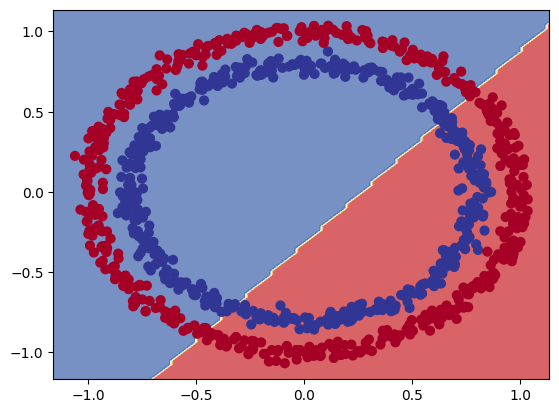

In [22]:
# check out predictions our model is making
plot_decision_boundary(model= model_3,
                       X=X,
                       y=y)

In [24]:

# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

In [26]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 6ms/step - loss: 555.0429 - mae: 555.0429
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 408.0989 - mae: 408.0989
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 266.7791 - mae: 266.7791
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 119.9373 - mae: 119.9373
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 62.1184 - mae: 62.1184
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 100.7281 - mae: 100.7281
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 72.5868 - mae: 72.5868
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 45.8711 - mae: 45.8711
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 48.7452 - mae: 48.7452
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 43.4067 - mae: 43.4067
Epoch 11/100
5/5 [=============================

Okay, it seems like our model is learning something (the mae value trends down with each epoch), let's plot its predictions.

2/2 [==============================] - 0s 8ms/step


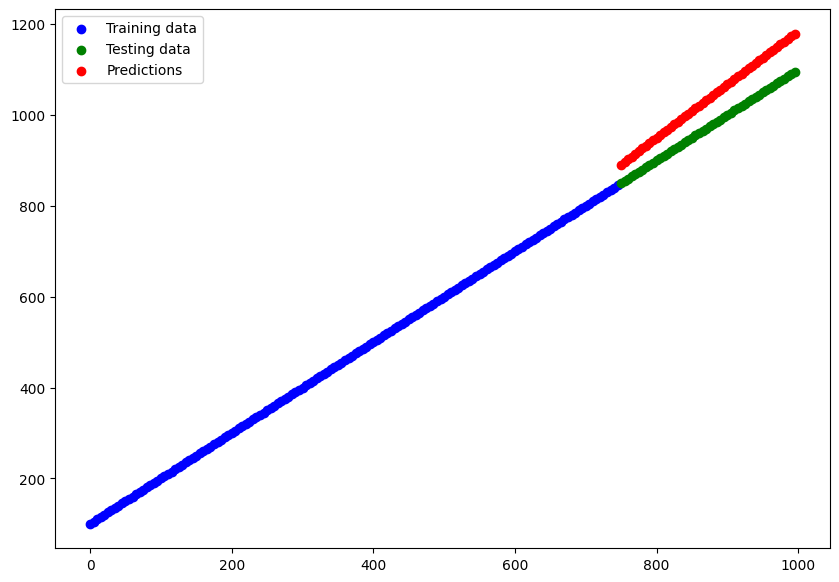

In [27]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();
     